# INSTALACION DE PAQUETES

In [ ]:
!pip install pandas numpy==1.20 matplotlib seaborn scipy imblearn requests tqdm scikit-learn umap-learn xgboost

# CARGA DE LIBRERIAS

In [ ]:
import database
import eda
import xgbm


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DESCARGA DE LOS DATOS

In [3]:
database.initialize_database()
cats = database.download_data()

# CARGA DATOS

In [4]:
database.upload_to_db(cats)

Todo listo. Base de datos en: /Users/guille/Documents/LASALLE/MASTER/MD005/Entregas/XGBOOST/database/quickdraw.db


# DESCARGA DE DATOS A DATAFRAME

In [5]:
df = database.get_dataframe()

# EDA

In [6]:
df

,id,category,data,recognized
0,1,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
1,2,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
2,3,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
3,4,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
4,5,dragon,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
...,...,...,...,...
29995,29996,diamond,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
29996,29997,diamond,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
29997,29998,diamond,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
29998,29999,diamond,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1


Transformamos el dataframe

In [7]:
df = eda.transform_dataframe(df)

Generadas 784 columnas de píxeles. Eliminando columna original 'data'...


In [8]:
eda.data_resume_info(df=df)

--- Informacion General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 787 entries, id to px_783
dtypes: int64(2), object(1), uint8(784)
memory usage: 23.1+ MB

--- Valores Nulos ---
id            0
category      0
recognized    0
px_0          0
px_1          0
             ..
px_779        0
px_780        0
px_781        0
px_782        0
px_783        0
Length: 787, dtype: int64

--- Filas Duplicadas ---
Total: 0

--- Estadisticas Descriptivas ---


,id,category,recognized,px_0,px_1,px_2,px_3,px_4,px_5,px_6,...,px_774,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783
count,30000.000000,30000,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,dragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,8660.398374,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7500.750000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,15000.500000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,22500.250000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


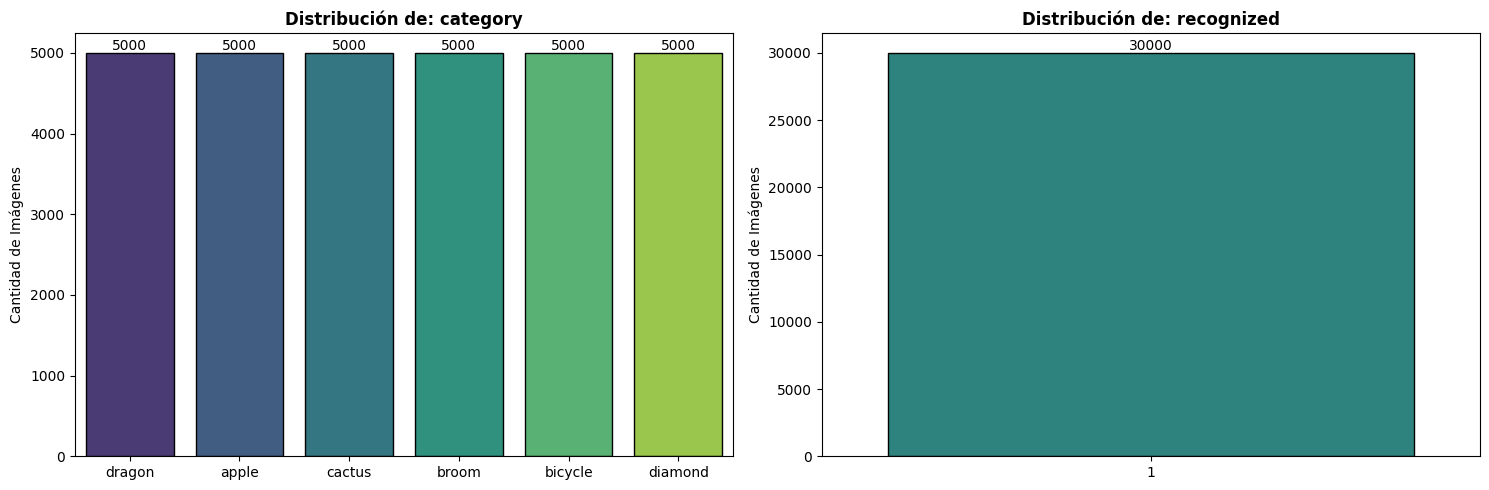

In [9]:
eda.plot_class_balance(df=df)

Encontramos que nuestro dataset se encuentra bastante balanceado, donde se garantiza que nuestras dos categorias de entrenamiento cuentan con la misma dimensionalidad. En caso de que haya una categoria con menor cantidad toca buscar metodologias de balanceo como SMOTE y undersampling, o en su defecto aplicar un poco de data augmentation para mejorar.

Generando imágenes promedio para 6 categorías...


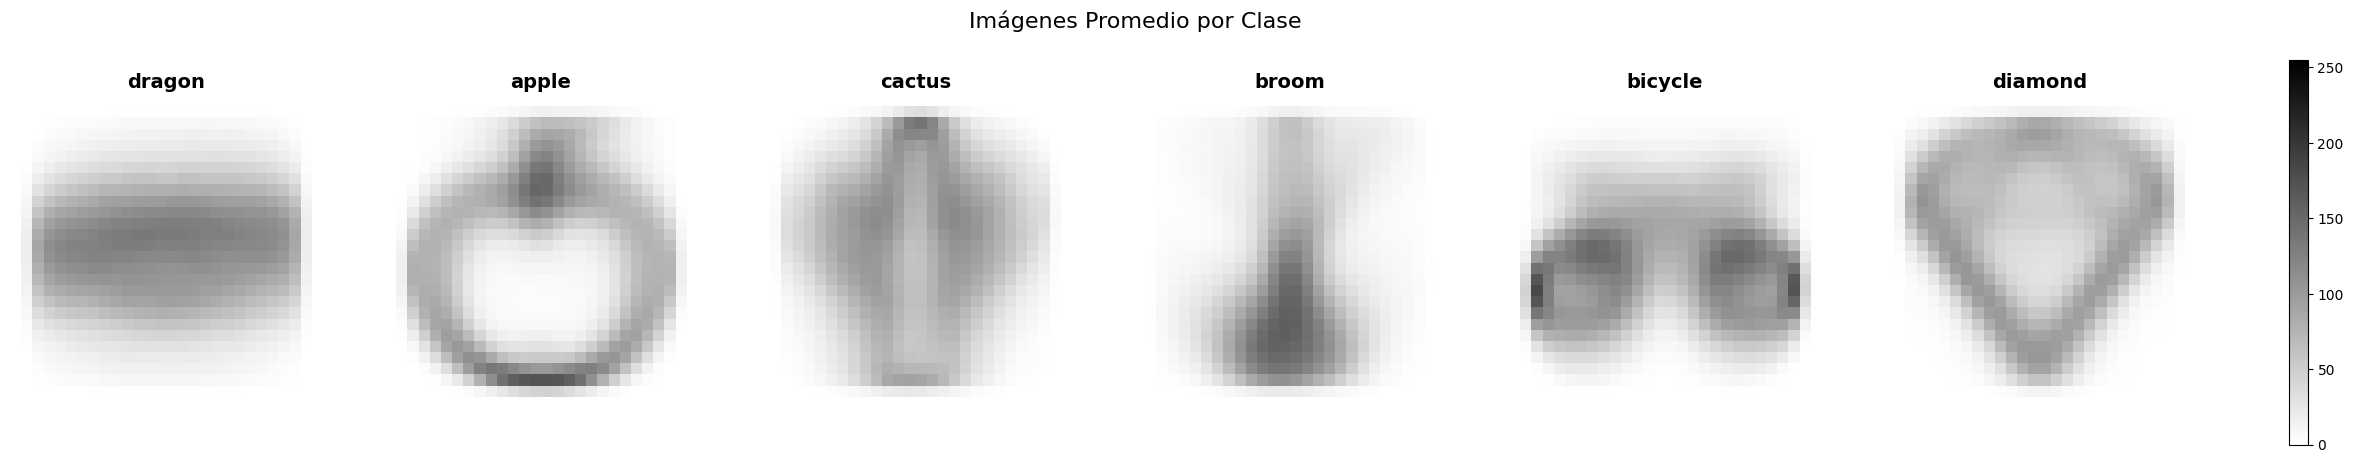

In [10]:
eda.plot_average_images(df=df)

sobre pone todas las imagenes que tengamos de la categoria e identifica de manera visual que tanto se parecen. Para el caso del dragon tenemos una sola nube gris, lo que implica que es una imagen compleja donde la interpretabilidad de individuo hace que la imagen cuenta con una alta varianza espacial es decir tenemos que generar un centrado por centro de masa
Para los otros casos se observa que siguen formas similares y tenemos una gran concentración de tinta en las partes caracteristicas de la imagen

Calculando complejidad (suma de intensidades)...


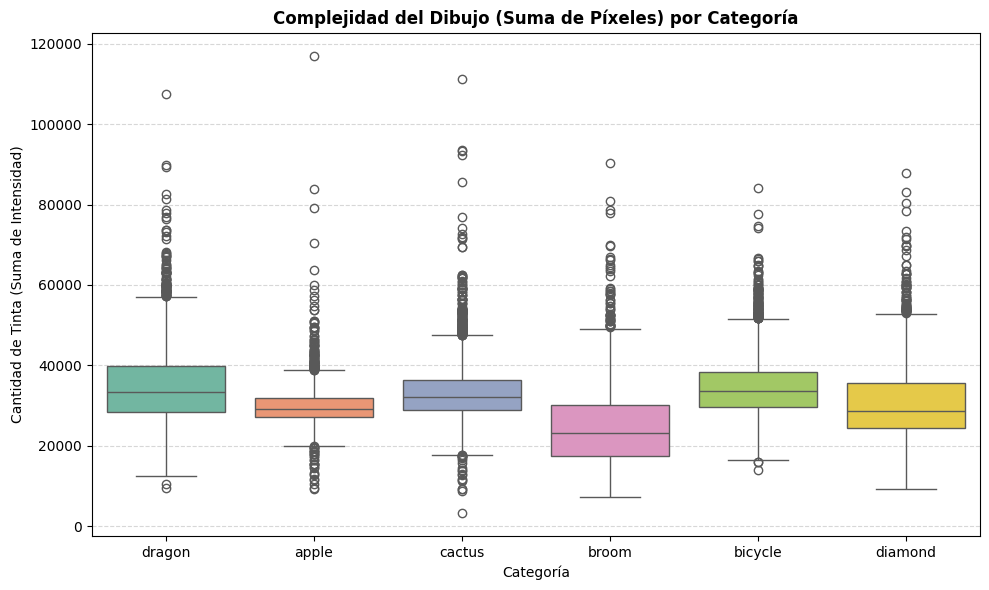

--- Estadísticas de Complejidad ---
                mean          std      min      50%       max
category                                                     
apple     29597.4442  4512.770194   9296.0  29243.5  117009.0
bicycle   34645.9852  7125.244940  13939.0  33659.5   84230.0
broom     24303.8366  9089.959264   7150.0  23296.5   90358.0
cactus    33159.7140  6852.011163   3206.0  32198.0  111157.0
diamond   30632.0032  8617.954504   9252.0  28687.0   87777.0
dragon    34759.8908  9032.102621   9447.0  33420.0  107570.0


In [11]:
eda.analyze_complexity(df=df)

observando la imagen podemos decir que definitivamente dragon tiene una mayor varianza, es decir una cantidad mayor de diferentes dibujos. Adicional encontramos que tenemos pixeles outlier, quiere decir, gente que dibujo usando mucha titna o poca. Para el caso de dragon observamos que se usa mucha más cantidad de tinta lo que quiere decir más cocnentración en los detalles del dibujo. Manzana tiene una cantidad superior de outliers por debajo del bigote inferior lo que quiere decir que hay más dibujos incompletos o lineas sueltas en el dibujo. Las imagenes tiene una diferencia significativa en sus medias, pero tenemos que se solapan, eso quiere decir, que si se tiene una imagen con una cantidad de tinta similar a la parte en la que se encuentran los boxplot al modelo le sería dificil distinguir los dos grupos.

In [12]:
eda.test_complexity_significance(df=df)

Calculando complejidad sobre 784 píxeles para el test...

--- Resultado ANOVA (Diferencia de Medias en Cantidad de Tinta) ---
Estadístico F: 1326.58
P-valor: 0.0000e+00


Con ANOVA confirmamos un Pvalor <0.05 lo que nos indica que rechazamos la hipotesis nula y decimos que por lo menos una de las media de concentración de tinta de nuestros grupos es diferente, lo que nos indica que no tenemos ningun dibujo que tenga en promedio la misma concentración de tinta que los otros grupos

Centramos las imagenes a partir de su centro de masa

Centrando 30000 imágenes. Esto puede tomar unos momentos...
Proceso finalizado.
Generando imágenes promedio para 6 categorías...


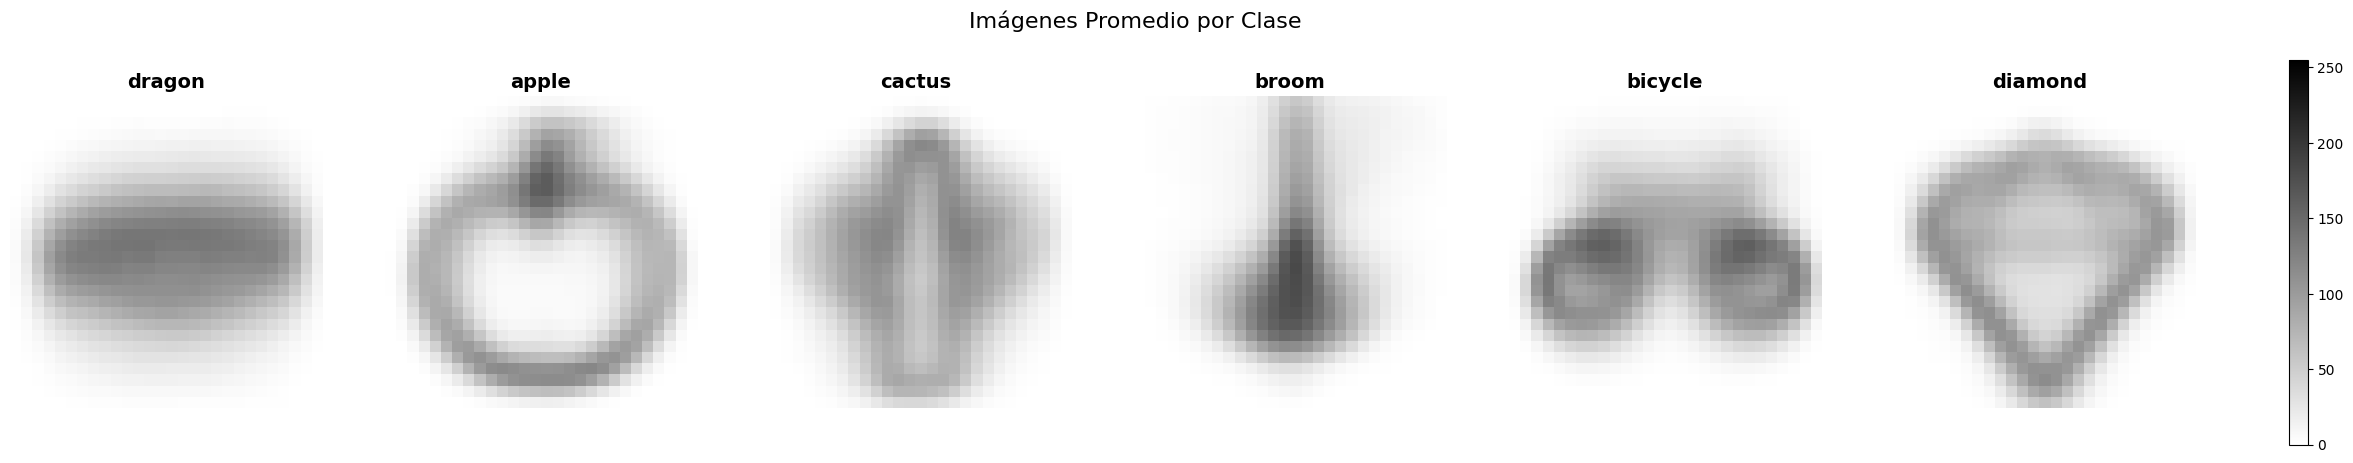

In [13]:
df_centered = eda.preprocess_center_images(df=df)
eda.plot_average_images(df=df_centered)

Calculando complejidad (suma de intensidades)...


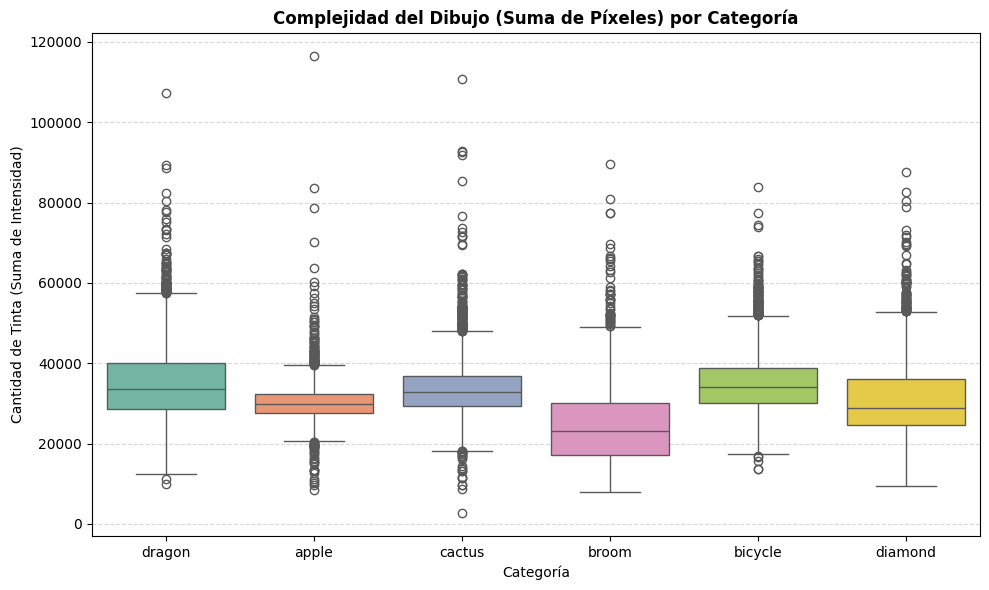

--- Estadísticas de Complejidad ---
                mean          std      min      50%       max
category                                                     
apple     30149.7958  4521.306807   8418.0  29834.5  116557.0
bicycle   35013.3370  7102.693741  13615.0  34087.5   83895.0
broom     24141.2674  8913.138428   7826.0  23067.5   89673.0
cactus    33609.5220  6817.589599   2620.0  32720.0  110645.0
diamond   30882.1502  8584.012293   9537.0  28861.0   87538.0
dragon    34927.6598  9042.050249   9829.0  33586.5  107299.0


In [14]:
eda.analyze_complexity(df=df_centered)

Calculando varianza para 784 píxeles...


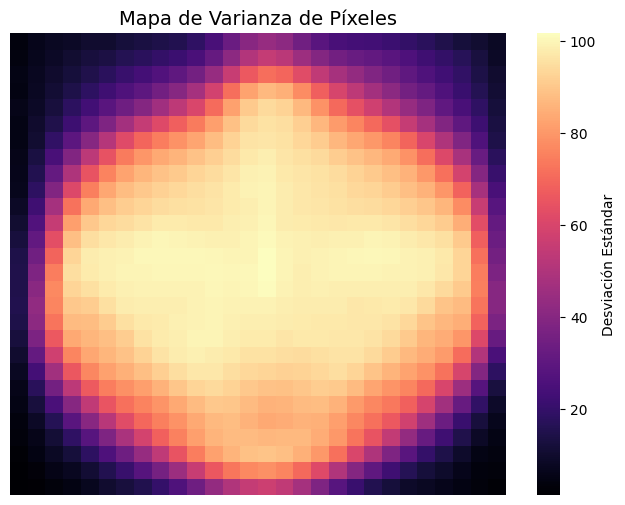

In [15]:
eda.plot_pixel_variance_heatmap(df=df_centered)

In [16]:
df_clean = eda.remove_low_variance_pixels(df, threshold=0)

Análisis de reducción de dimensionalidad (Threshold=0)...
Columnas iniciales: 784
Columnas finales: 676


In [17]:
df_clean.shape

(30000, 679)

Usando una muestra de 500 imágenes para UMAP...
Ejecutando UMAP en 500 imágenes...


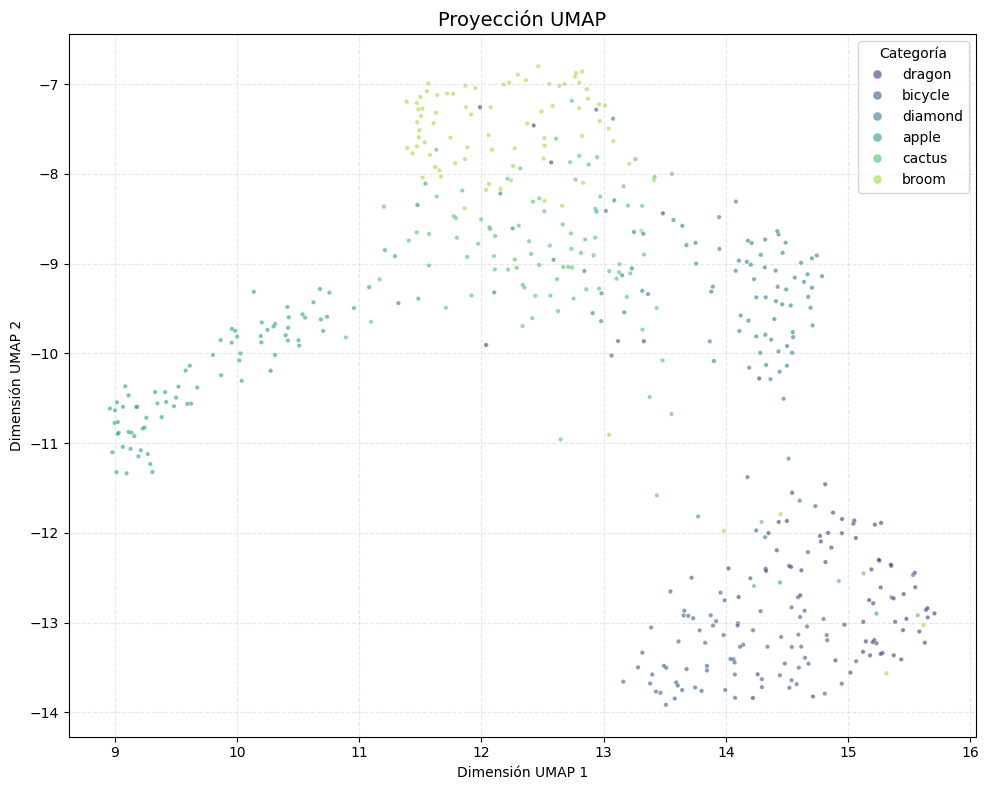

In [18]:
eda.visualize_umap_projection(df_clean, n_samples=500)

Como sabemos que la base de datos tiene algunos dibujos que están prácticamente vacíos, vamos a proceder a intentar eliminar los que tienen poca tinta, mostrando un heatmap de los dibujos

Umbral mínimo de tinta (q=0.01): 11970.9
Cantidad de dibujos sospechosos de estar vacíos: 300
Conteo de categorías en dibujos con poca tinta:
category
broom      270
diamond     16
cactus       7
apple        5
dragon       2
Name: count, dtype: int64

Distribución de 'recognized' en estos dibujos:
  - 1: 100.00%


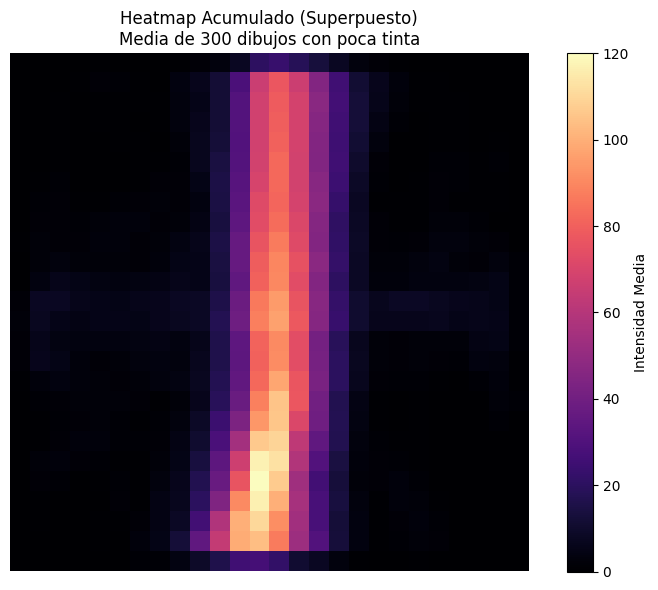


Mostrando revisión completa de los 300 dibujos seleccionados...


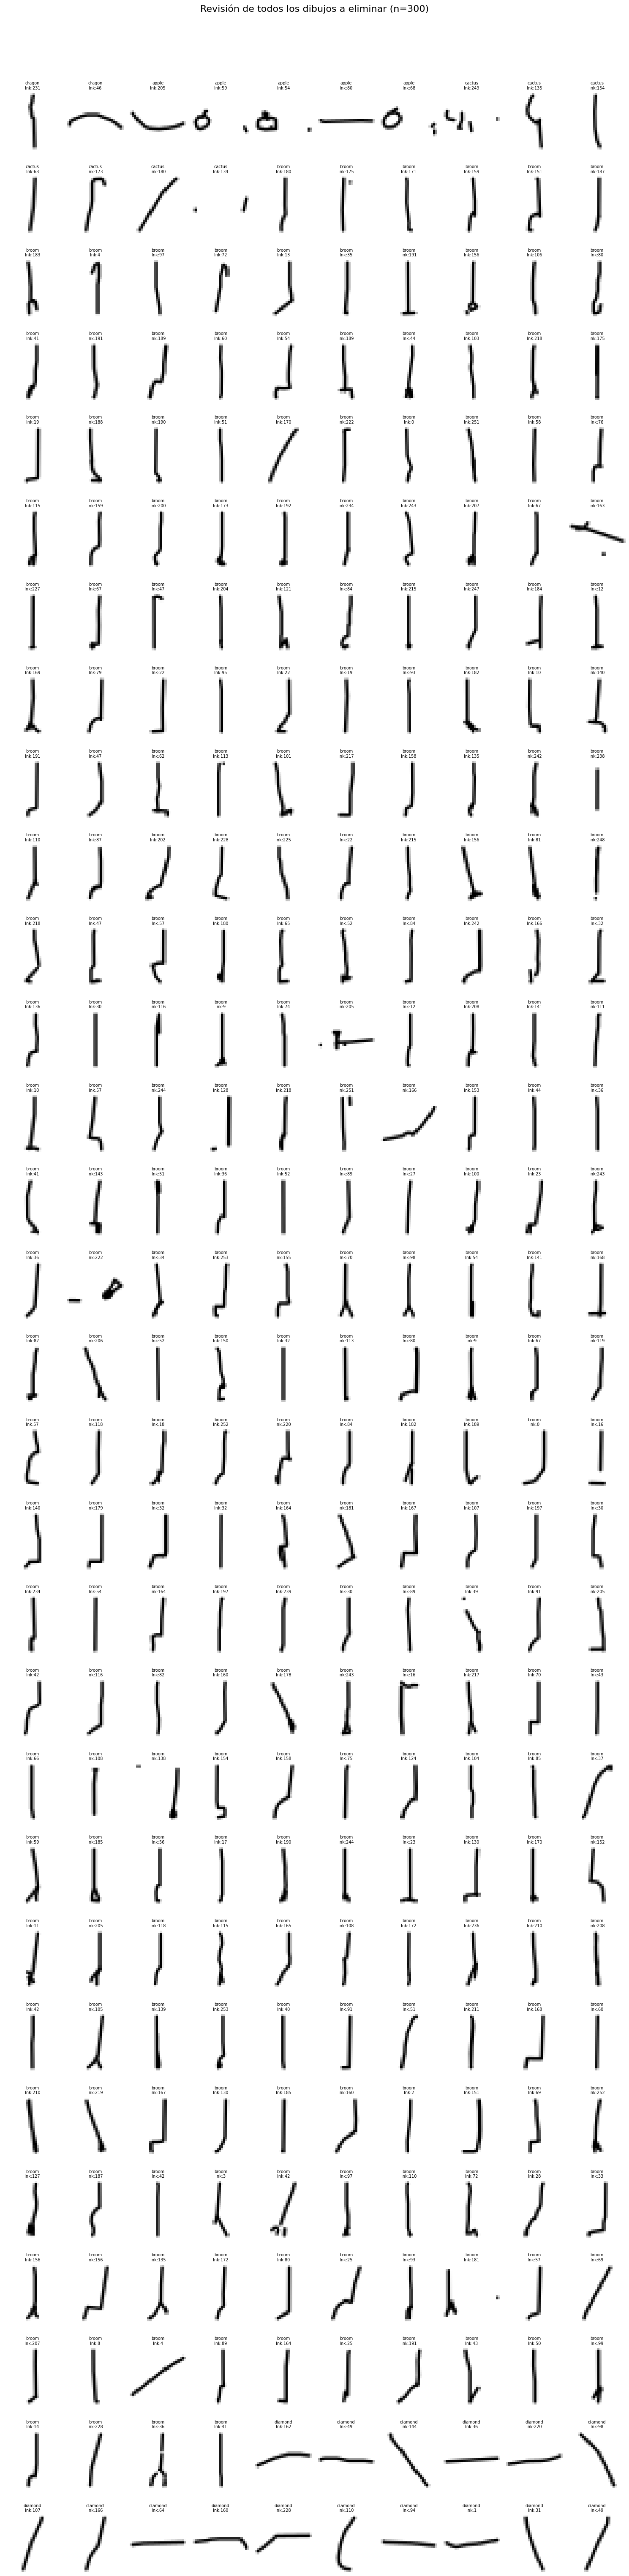

Eliminados 300 dibujos. Filas restantes: 29700


In [19]:
df_clean = eda.drop_low_ink_drawings(df_clean, quantile=0.01)

En el heatmap, podemos ver que hay unos 30 dibújos que parecen estar vacíos, concentrandose todos en lo que parece ser que han dibujado una linea vertical y horizontal.